In [1]:
from sklearn.datasets import load_boston
X, y = load_boston(return_X_y=True)

Text(0.5, 1.0, 'Distribution of Housing Prices')

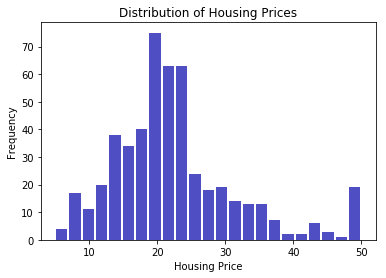

In [5]:
import matplotlib.pyplot as plt

n, bins, patches = plt.hist(x=y, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.xlabel('Housing Price')
plt.ylabel('Frequency')
plt.title('Distribution of Housing Prices')

In [8]:
from sklearn.model_selection import train_test_split

test_size = .3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

In [30]:
import xgboost as xgb
eval_set = [(X_train, y_train), (X_test, y_test)]

rmse_model = xgb.XGBRegressor(objective='reg:squarederror',
                              eval_metric="rmsle",
                              nthread=4, seed=27)
rmsle_model = xgb.XGBRegressor(objective='reg:squaredlogerror',
                               eval_metric="rmsle",
                               nthread=4, seed=27)
gamma_model = xgb.XGBRegressor(objective='reg:gamma',
                               eval_metric="rmsle",
                               nthread=4, seed=27)

rmse_model.fit(X_train, y_train, eval_set=eval_set, verbose=False)
rmsle_model.fit(X_train, y_train, eval_set=eval_set, verbose=False)
gamma_model.fit(X_train, y_train, eval_set=eval_set, verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, eval_metric='rmsle',
       gamma=0, gpu_id=-1, importance_type='gain',
       interaction_constraints='', learning_rate=0.300000012,
       max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
       monotone_constraints='()', n_estimators=100, n_jobs=4, nthread=4,
       num_parallel_tree=1, objective='reg:gamma', random_state=27,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=None, seed=27,
       subsample=1, tree_method='exact', validate_parameters=1,
       verbosity=None)

In [24]:
import numpy as np
def rmsle(y, y0):
    return np.sqrt(np.mean(np.square(np.log1p(y) - np.log1p(y0))))

print("RMSLE with squared error objective:", rmsle(y_test, rmse_model.predict(X_test)))
print("RMSLE with squared log error objective:", rmsle(y_test, rmsle_model.predict(X_test)))
print("RMSLE with gamma objective:", rmsle(y_test, gamma_model.predict(X_test)))

RMSLE with squared error objective: 0.13572739921547863
RMSLE with squared log error objective: 0.38994512278223104
RMSLE with gamma objective: 0.1213614946075695
